In [ ]:
import pandas as pd
import numpy as np
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential

#from keras.layers.embeddings import Embedding

from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import SpatialDropout1D 

In [ ]:
pip install cufflinks --upgrade)

/bin/bash: -c: line 0: syntax error near unexpected token `)'
/bin/bash: -c: line 0: `pip install cufflinks --upgrade)'


In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
data=pd.read_csv("mtsamples.csv")
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
data.shape

(4999, 6)

In [ ]:
data['medical_specialty'].value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [ ]:
# Check the null values
data.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [ ]:
data.dropna(subset=['transcription'],axis=0,inplace=True)

In [ ]:
data.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64

In [ ]:
data.shape

(4966, 6)

In [ ]:
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [ ]:
# Remove the classes having data samples less than 50
data1=data.groupby('medical_specialty').filter(lambda x : len(x)>50)

In [ ]:
data1['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
Name: medical_specialty, dtype: int64

In [ ]:
data1.shape

(4597, 6)

After removing null values, classes having less than 50 samples the size od database is 4597 x 6, having 21 different classes

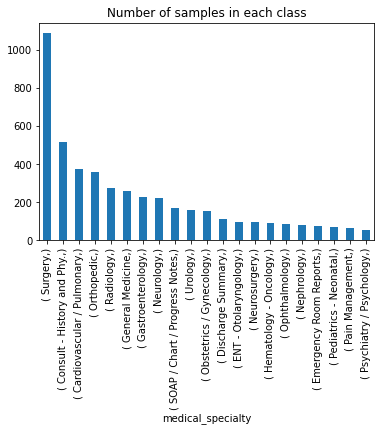

In [ ]:
fig=data1[['medical_specialty']].value_counts().sort_values(ascending=False).plot(kind='bar',title='Number of samples in each class')


In [ ]:
print('Sample transcription 1:'+data1.iloc[4]['transcription']+'\n')
print('Sample transcription 2:'+data1.iloc[14]['transcription']+'\n')

Sample transcription 1:2-D STUDY,1. Mild aortic stenosis, widely calcified, minimally restricted.,2. Mild left ventricular hypertrophy but normal systolic function.,3. Moderate biatrial enlargement.,4. Normal right ventricle.,5. Normal appearance of the tricuspid and mitral valves.,6. Normal left ventricle and left ventricular systolic function.,DOPPLER,1. There is 1 to 2+ aortic regurgitation easily seen, but no aortic stenosis.,2. Mild tricuspid regurgitation with only mild increase in right heart pressures, 30-35 mmHg maximum.,SUMMARY,1. Normal left ventricle.,2. Moderate biatrial enlargement.,3. Mild tricuspid regurgitation, but only mild increase in right heart pressures.

Sample transcription 2:PROCEDURES:, Cystourethroscopy and transurethral resection of prostate.,COMPLICATIONS:, None.,ADMITTING DIAGNOSIS:, Difficulty voiding.,HISTORY:, This 67-year old Hispanic male patient was admitted because of enlarged prostate and symptoms of bladder neck obstruction.  Physical examination

In [ ]:
#compile a regular expression pattern

special_character_remover = re.compile('[/(){}\[\]\|@,;#*+]')
extra_symbol_remover = re.compile('[^a-z.]')
extra_space_remover=re.compile(' +')

In [ ]:
# Function to clean the text

def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub('',text)
    text = extra_symbol_remover.sub(' ',text)
    text = extra_space_remover.sub(' ',text)
    text = text.replace('. .', '.')
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [ ]:
data1['transcription'] = data1['transcription'].apply(clean_text)

In [ ]:
print('Sample transcription 1:'+data1.iloc[4]['transcription']+'\n')
print('Sample transcription 2:'+data1.iloc[14]['transcription']+'\n')

Sample transcription 1: d study . mild aortic stenosis widely calcified minimally restricted. mild left ventricular hypertrophy but normal systolic function. moderate biatrial enlargement. normal right ventricle. normal appearance of the tricuspid and mitral valves. normal left ventricle and left ventricular systolic function.doppler . there is to aortic regurgitation easily seen but no aortic stenosis. mild tricuspid regurgitation with only mild increase in right heart pressures mmhg maximum.summary . normal left ventricle. moderate biatrial enlargement. mild tricuspid regurgitation but only mild increase in right heart pressures.

Sample transcription 2:procedures cystourethroscopy and transurethral resection of prostate.complications none.admitting diagnosis difficulty voiding.history this year old hispanic male patient was admitted because of enlarged prostate and symptoms of bladder neck obstruction. physical examination revealed normal heart and lungs. abdomen was negative for ab

In [ ]:
print('Sample transcription 1 length:',len(data1.iloc[200]['transcription']))
print('Sample transcription 2 length:',len(data1.iloc[24]['transcription']))

Sample transcription 1 length: 1039
Sample transcription 2 length: 2295


Now convert the words into integer numbers

In [43]:
# The maximum number of words to be used (Vocabulary/Corpus)
MAX_NB_WORDS = 50000
# Max number of words in each transcription
MAX_SEQUENCE_LENGTH = 400

EMBEDDING_DIM = 100

In [44]:
# Tokenization using Keras Tokenizer

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data1['transcription'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21551 unique tokens.


In [45]:
word_index

{'the': 1,
 'and': 2,
 'was': 3,
 'of': 4,
 'to': 5,
 'a': 6,
 'with': 7,
 'in': 8,
 'is': 9,
 'patient': 10,
 'she': 11,
 'no': 12,
 'for': 13,
 'were': 14,
 'he': 15,
 'on': 16,
 'this': 17,
 'at': 18,
 'then': 19,
 'right': 20,
 'left': 21,
 'has': 22,
 'as': 23,
 'or': 24,
 'that': 25,
 'her': 26,
 'there': 27,
 'history': 28,
 'had': 29,
 'his': 30,
 'procedure': 31,
 'be': 32,
 'normal': 33,
 'placed': 34,
 'an': 35,
 'not': 36,
 'well': 37,
 'from': 38,
 'i': 39,
 'are': 40,
 's': 41,
 'pain': 42,
 'which': 43,
 'we': 44,
 'it': 45,
 'any': 46,
 'have': 47,
 'by': 48,
 'after': 49,
 'x': 50,
 'mg': 51,
 'c': 52,
 'noted': 53,
 'also': 54,
 'using': 55,
 'but': 56,
 'time': 57,
 'will': 58,
 'blood': 59,
 'performed': 60,
 'into': 61,
 'been': 62,
 'anesthesia': 63,
 'skin': 64,
 'all': 65,
 'without': 66,
 'removed': 67,
 'incision': 68,
 'used': 69,
 'room': 70,
 'year': 71,
 'old': 72,
 'artery': 73,
 'diagnosis': 74,
 'some': 75,
 'through': 76,
 'general': 77,
 'anterior': 7

In [46]:
# Truncate and padding the input sequences, so that they all will be in the same length for modeling.

X = tokenizer.texts_to_sequences(data1['transcription'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4597, 400)


In [47]:
# # Label encoding for the class column

# encoder = LabelEncoder()
# Y = encoder.fit_transform(data1['medical_specialty'].values)
# print('Shape of label tensor:', Y.shape)
# print(Y)

In [48]:
# Create dummy varaibles for each class

Y= pd.get_dummies(data1['medical_specialty'])
Y

,Cardiovascular / Pulmonary,Consult - History and Phy.,Discharge Summary,ENT - Otolaryngology,Emergency Room Reports,Gastroenterology,General Medicine,Hematology - Oncology,Nephrology,Neurology,...,Obstetrics / Gynecology,Ophthalmology,Orthopedic,Pain Management,Pediatrics - Neonatal,Psychiatry / Psychology,Radiology,SOAP / Chart / Progress Notes,Surgery,Urology
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4973,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4974,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4975,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4137, 400) (4137, 21)
(460, 400) (460, 21)


In [50]:
X.shape[1]

400

The first layer is the embedding layer that uses 128 length vectors to represent each word.
Spatial Dropout performs variational dropout in NLP models.
The next layer is the LSTM layer with 100 memory units.
The output layer must create 21 output values, one for each class.
Activation function is softmax for multi-class classification.
Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

In [51]:
# The maximum number of words to be used (Vocabulary/Corpus)
MAX_NB_WORDS = 50000
# Max number of words in each transcription
MAX_SEQUENCE_LENGTH = 400

EMBEDDING_DIM = 128

epochs = 5
batch_size = 128

In [52]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(21, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1) #,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
30/30 [==============================] - 57s 2s/step - loss: 2.8265 - accuracy: 0.2216 - val_loss: 2.6604 - val_accuracy: 0.2319
Epoch 2/5
30/30 [==============================] - 53s 2s/step - loss: 2.6189 - accuracy: 0.2350 - val_loss: 2.5639 - val_accuracy: 0.2560
Epoch 3/5
30/30 [==============================] - 55s 2s/step - loss: 2.4078 - accuracy: 0.3164 - val_loss: 2.3628 - val_accuracy: 0.3406
Epoch 4/5
30/30 [==============================] - 54s 2s/step - loss: 2.3081 - accuracy: 0.3306 - val_loss: 2.3633 - val_accuracy: 0.3285
Epoch 5/5
30/30 [==============================] - 54s 2s/step - loss: 2.1782 - accuracy: 0.3640 - val_loss: 2.2850 - val_accuracy: 0.3551


In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 128)          6400000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 400, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               91600     
                                                                 
 dense_3 (Dense)             (None, 21)                2121      
                                                                 
Total params: 6,493,721
Trainable params: 6,493,721
Non-trainable params: 0
_________________________________________________________________
